Edureka:

https://www.edureka.co/ai-deep-learning-with-tensorflow

Deep inside Autoencoders: https://towardsdatascience.com/deep-inside-autoencoders-7e41f319999f

In [1]:
import numpy as np

In [2]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.activations import relu, sigmoid
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError

from tensorflow.keras.datasets import mnist

In [3]:
import matplotlib.pyplot as plt

Autoencoder sizes

In [4]:
multilayer_input_size = 784
multilayer_hidden_size = 128
multilayer_code_size = 64

The autoencoder

In [5]:
multilayer_autoencoder = Sequential([
        Input(shape=(multilayer_input_size)),
        # Encoder
        Dense(multilayer_hidden_size, activation=relu),
        Dense(multilayer_code_size, activation='relu'),
        # Decoder
        Dense(multilayer_hidden_size, activation='relu'),
        Dense(multilayer_input_size, activation=sigmoid) 
    ])

Configure our model to use a per-pixel binary crossentropy loss

In [6]:
multilayer_autoencoder.compile(optimizer=Adam(), loss=MeanSquaredError())

Prepare our input data. We're using MNIST digits and we're discarding the labels

In [7]:
(x_train, _), (x_test, _) = mnist.load_data()

Normalize all values between 0 and 1 and we will flatten the 28x28 imagesinto vectors of size 784

In [8]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

In [9]:
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [10]:
print(x_train.shape)

(60000, 784)


In [11]:
print(x_test.shape)

(10000, 784)


Train autoencoder for 50 epochs

In [12]:
multilayer_autoencoder.fit(x_train, x_train,
               epochs=50,
               batch_size=256,
               shuffle=True,
               validation_data=(x_test,x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 27us/sample - loss: 0.0563 - val_loss: 0.0298
Epoch 2/50
60000/60000 [==============================] - 1s 19us/sample - loss: 0.0234 - val_loss: 0.0187
Epoch 3/50
60000/60000 [==============================] - 1s 19us/sample - loss: 0.0169 - val_loss: 0.0144
Epoch 4/50
60000/60000 [==============================] - 1s 19us/sample - loss: 0.0137 - val_loss: 0.0123
Epoch 5/50
60000/60000 [==============================] - 1s 20us/sample - loss: 0.0117 - val_loss: 0.0106
Epoch 6/50
60000/60000 [==============================] - 1s 19us/sample - loss: 0.0105 - val_loss: 0.0096
Epoch 7/50
60000/60000 [==============================] - 1s 24us/sample - loss: 0.0095 - val_loss: 0.0088
Epoch 8/50
60000/60000 [==============================] - 1s 20us/sample - loss: 0.0088 - val_loss: 0.0082
Epoch 9/50
60000/60000 [==============================] - 1s 19us/sample - loss: 0.0082 - val_

Encode and decode some digits.

Note that we take them from the *test* set

In [13]:
decoded_imgs = multilayer_autoencoder.predict(x_test)

Visualize the reconstructed inputs and the encoded representation.

In [14]:
n = 20 # how many digits we will display

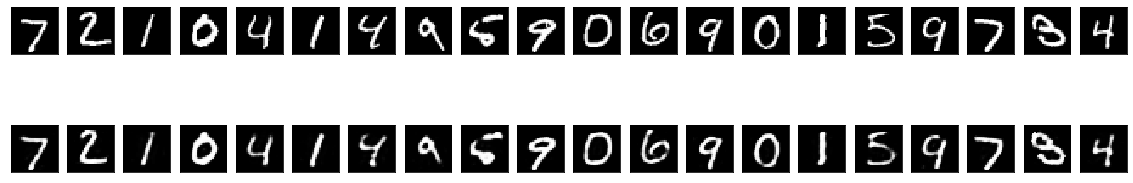

In [15]:
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()